# <center>  World Happiness Visualization and Prediction  <center>  

# 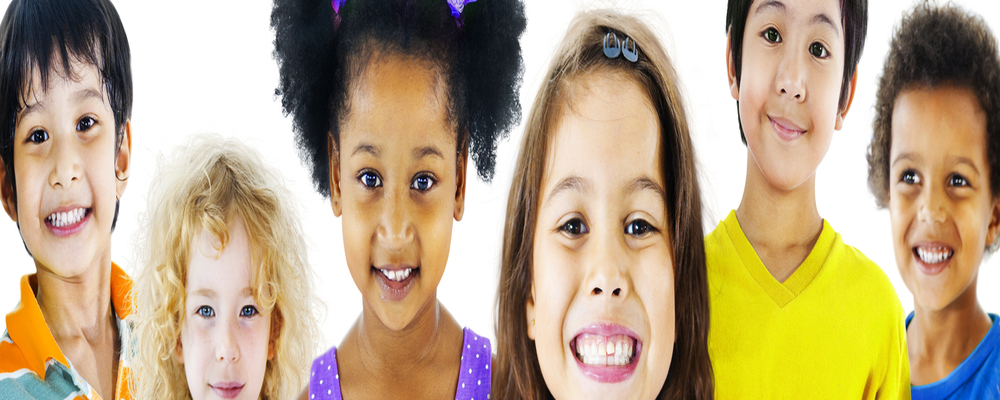

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Predicting-Happiness-Score" data-toc-modified-id="Predicting-Happiness-Score-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predicting Happiness Score</a></span><ul class="toc-item"><li><span><a href="#Encoding-Categorical-Variables" data-toc-modified-id="Encoding-Categorical-Variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Encoding Categorical Variables</a></span></li><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Decision Tree Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Support Vector Regression</a></span></li><li><span><a href="#XGBoost-Regression" data-toc-modified-id="XGBoost-Regression-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>XGBoost Regression</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

The World Happiness Report is a landmark survey of the state of global happiness. This report reviews the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. 

The dataset that we have chosen is Happiness Dataset 2016, one of Kaggle’s dataset. This dataset gives the happiness rank and happiness score of 155 countries around the world based on factors including family, health, economy, generosity, trust in government, freedom, country, region and dystopia residual.

There are three parts to my report as follows:

- Feature Engoineering 
- Visualization 
- Prediction

Our first objective is to determine factors that are more important to live a happier life. Our second purpose is to implement several machine learning algorithms including Linear Regression, Decision Tree Regression, Random Forest Regression, Support Vector Regression and XGBoost Regression to predict the happiness scores throughout the world. We will compare the results to discover which algorithm works better for this specific dataset.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
import xgboost as xgb
import plotly.io as pio
pio.renderers.default='notebook'

## Loading Dataset

In [ ]:
df=pd.read_csv('../input/world-happiness/2016.csv')

In [ ]:
df.head(1)

In [ ]:
df.shape

In [ ]:
df.info()

We can see that the dataset does not contain null values. So it does not need Data Cleaning.

## Feature Engineering

We remove unnecessary columns.

In [ ]:
df.drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1,inplace=True)

Now we rename some of the columns.

In [ ]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns=['country', 'region', 'happiness_rank', 'happiness_score', 'economy', 'family', 'health', 'freedom', 'trust','generosity', 'dystopia_residual']

In [ ]:
df.head()

In [ ]:
df.describe()

## Exploratory Data Analysis

We explore the correlation between all numeric variables.

In [ ]:
plt.figure(figsize=(10,10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='ocean')
plt.title('\nCorrelation Plot of Happiness Data', fontsize=18)
plt.show()

According to the above cor plot, economy plays the most significant role in contributing to happiness. Generosity has the lowest impact on happiness score and happiness_rank has a reverse impact on happiness score.

In [ ]:
plt.figure(figsize=(10,7))
df.corr()['happiness_score'].sort_values(ascending=False).drop(['happiness_score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with Happiness Score',fontsize=14)
plt.title('Correlation of Features with Happiness Score',fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['happiness_score'], bins=50, kde=True, hist_kws=dict(edgecolor='w'), color='b')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Happiness Score', fontsize=15)
plt.show()

We can observe that most of the happiness_score values are between 5 and 5.5.

We visualize the mean happiness scores of different regions.

In [ ]:
df_region=df.groupby('region').mean().sort_values(by='happiness_score', ascending=False).reset_index()

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='region', y='happiness_score', data=df_region, palette='rainbow')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Happiness Rank', fontsize=14)
plt.xticks(rotation=90)
plt.title('Mean Happiness Score Versus Regions\n', fontsize=18)
plt.show()

It can be seen that the highest mean happiness score among the regions is related to Australia and New Zealand.

We use strip plot to see the happiness score distribution in different regions.

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='region',y='happiness_score',data=df,palette='Dark2')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Happiness Rank', fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution Of Happiness Score In Different Regions\n', fontsize=18)
plt.show()

Now let's visualize thetop 10 countries with the highest happiness scores.

In [ ]:
df_country=df.groupby('country').mean().sort_values(by='happiness_score', ascending=False).reset_index().head(10)

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(x=df_country['happiness_score'], labels=df_country['country'], autopct='%1.2f%%', pctdistance=0.6,labeldistance=1.1,shadow=True, colors=['limegreen', 'deeppink','cyan','pink', 'teal', 'lime','paleturquoise', 'mediumpurple','violet','royalblue'], textprops={'fontsize':14}, explode=(0.2,0,0,0,0,0,0,0,0,0))
plt.title('Top 10 Countries With The Highest Mean Happiness Scores', fontsize=18)
plt.show()

It can be seen that the highest mean happiness score among the countries is related to Denmark.

We visualize the relationship between happiness_score, economy, family, health and freedom.

In [ ]:
n=sns.PairGrid(df, x_vars=['happiness_score','economy','family','health','freedom'],y_vars=['happiness_score','economy','family','health','freedom'],height=2, aspect=1.2)
n.map_upper(plt.scatter,color='teal')
n.map_diag(sns.distplot,color='lime')
n.map_lower(sns.regplot,color='royalblue')
plt.suptitle('Relationship Between Happiness Score, Economy, Family, Health And Freedom',y=1.05,fontsize=14)
plt.show()

Let's visualize the relationship between happiness_score, trust, generosity, and dystopia_residual.

In [ ]:
fig=px.scatter_3d(data_frame=df, x='trust', y='generosity', z='dystopia_residual', color='happiness_score',color_continuous_scale='algae')
fig.update_layout(
    title={
        'text': 'Relationship Between Happiness Score, Trust, Generosity, And Dystopia Residual',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

As mentioned before, economy plays the most significant role in contributing to happiness. So here we explore its influence in different regions throughout the world.

In [ ]:
sns.lmplot (x='economy', y='happiness_score', data=df, scatter=False, hue='region', legend=False, height=6.5)
plt.title('The Influence Of Economy On Happiness Score In Different Regions', fontsize=18)
plt.legend(title='Region', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.6,0.7), borderaxespad=0, loc='right')
plt.xlabel('Economy', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.show()

We can see that except for North America and Australia and New Zealand, happiness scores increase with economy.

## Predicting Happiness Score

In this section, we will implement several machine learning algorithms to predict happiness score.

### Encoding Categorical Variables

**Country**

In [ ]:
le1=LabelEncoder()
le1.fit(df['country'])
df['country']=le1.transform(df['country'])

**Region**

In [ ]:
le2=LabelEncoder()
le2.fit(df['region'])
df['region']=le2.transform(df['region'])

### Splitting the Data

 First, we should split our dataset into training and test set. Our dependent variable is happiness score, and the independent variables are country, continent,family, economy, health, trust, freedom, generosity, and dystopia residual.

In [ ]:
X=df[['country', 'region', 'economy','family', 'health', 'freedom', 'trust', 'generosity','dystopia_residual']]
y=df['happiness_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

In [ ]:
print('MAE_Linear Regression=', metrics.mean_absolute_error(y_test,predictions_lr))
print('MSE_Linear Regression=', metrics.mean_squared_error(y_test,predictions_lr))
print('RMSE_Linear Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_lr)))
print('MAPE_Linear Regression=', 100*metrics.mean_absolute_error(y_test,predictions_lr)/df['happiness_score'].mean())
print('R2 Score_Linear Regression=',metrics.r2_score(y_test,predictions_lr))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Decision Tree Regression 

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predictions_dtr=dtr.predict(X_test)

In [ ]:
print('MAE_Decision Tree Regression=', metrics.mean_absolute_error(y_test,predictions_dtr))
print('MSE_Decision Tree Regression=', metrics.mean_squared_error(y_test,predictions_dtr))
print('RMSE_Decision Tree Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_dtr)))
print('MAPE_Decision Tree Regression=', 100*metrics.mean_absolute_error(y_test,predictions_dtr)/df['happiness_score'].mean())
print('R2 Score_Decision Tree Regression=',metrics.r2_score(y_test,predictions_dtr))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_dtr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

### Random Forest Regression

In [ ]:
rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
predictions_rfr=rfr.predict(X_test)

In [ ]:
print('MAE_Random Forest Regression=', metrics.mean_absolute_error(y_test,predictions_rfr))
print('MSE_Random Forest Regression=', metrics.mean_squared_error(y_test,predictions_rfr))
print('RMSE_Random Forest Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_rfr)))
print('MAPE_Random Forest Regression=', 100*metrics.mean_absolute_error(y_test,predictions_rfr)/df['happiness_score'].mean())
print('R2 Score_Random Forest Regression=',metrics.r2_score(y_test,predictions_rfr))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_rfr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Random Forest Regression' ,fontsize=18)
plt.show()

### Support Vector Regression

In [ ]:
svr=SVR(gamma='auto')
svr.fit(X_train,y_train)
predictions_svr=svr.predict(X_test)

In [ ]:
print('MAE_Support Vector Regression=', metrics.mean_absolute_error(y_test,predictions_svr))
print('MSE_Support Vector Regression=', metrics.mean_squared_error(y_test,predictions_svr))
print('RMSE_Support Vector Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_svr)))
print('MAPE_Support Vector Regression=', 100*metrics.mean_absolute_error(y_test,predictions_svr)/df['happiness_score'].mean())
print('R2 Score_Support Vector Regression=',metrics.r2_score(y_test,predictions_svr))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_svr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

### XGBoost Regression

In [ ]:
xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgbr.fit(X_train,y_train)
predictions_xgbr=xgbr.predict(X_test)

In [ ]:
print('MAE_XGBoost Regression=', metrics.mean_absolute_error(y_test,predictions_xgbr))
print('MSE_XGBoost Regression=', metrics.mean_squared_error(y_test,predictions_xgbr))
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_xgbr)))
print('MAPE_XGBoost Regression=', 100*metrics.mean_absolute_error(y_test,predictions_xgbr)/df['happiness_score'].mean())
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,predictions_svr))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_xgbr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('XGBoost Regression',fontsize=18)
plt.show()

So we conclude that Linear Regression with the R2 Score of 99.99% is the best model for predicting the happiness score across the world.

## Conclusion

-  We performed Exploratory Data Analysis and visualized the impacts of various features on happiness score throughout the world.

-  Linear Regression algorithm with the R2 Score of 99.99% was the best model for predicting  the happiness score across in the world.